In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [8]:
caminho = '../Resultado de Poços Exploratórios em Atividade.csv'

In [9]:
df = pd.read_csv(caminho, sep=';', encoding='latin-1')
df.columns = df.columns.str.strip()


In [10]:
df = pd.read_csv(
    caminho,
    sep=';',
    encoding='latin-1',
    engine='python',
    quoting=3,
    dtype=str,
    on_bad_lines='skip'
)

df.columns = df.columns.str.strip()

In [11]:
df.columns

Index(['Nome Poço ANP', 'Nome Poço Operador', 'Bloco', 'Bacia', 'Campo',
       'Contrato', 'Operador', 'Início Perfuração', 'Lâmina d'água (m)',
       'Latitude', 'Longitude', 'Objetivo da Intervenção', 'Sonda',
       'Terra ou Mar'],
      dtype='object')

In [12]:
df['Início Perfuração'] = pd.to_datetime(df['Início Perfuração'], dayfirst=True, errors='coerce')


In [13]:
df["Lâmina d'água (m)"] = (
    df["Lâmina d'água (m)"]
    .str.replace('.', '', regex=False)   # Remove separador de milhar
    .str.replace(',', '.', regex=False) # Troca vírgula decimal por ponto
    .astype(float, errors='ignore')     # Converte se possível
)


In [14]:
def dms_to_decimal(coord):
    if pd.isna(coord):
        return None

    try:
        coord = coord.strip().replace(',', '.').replace('\t', '')
        d, m, s = [float(x) for x in coord.split(':')]
        sign = -1 if d < 0 else 1
        return sign * (abs(d) + m / 60 + s / 3600)
    except:
        return None


In [15]:


df['Latitude_decimal'] = df['Latitude'].apply(dms_to_decimal)
df['Longitude_decimal'] = df['Longitude'].apply(dms_to_decimal)


In [16]:
df

,Nome Poço ANP,Nome Poço Operador,Bloco,Bacia,Campo,Contrato,Operador,Início Perfuração,Lâmina d'água (m),Latitude,Longitude,Objetivo da Intervenção,Sonda,Terra ou Mar,Latitude_decimal,Longitude_decimal
0,1-BGM-6-ES,1-AJR-1-ES,ES-T-506,Espírito Santo,PA-1-BGM-6-ES_ES-T-506_R11,48610005466201372,BGM,2022-08-18,0.0,"""\t-19:18:19,427 ""","""\t-39:50:00,328 """,TLD,Cowan-02,TERRA,None,None
1,1-BP-13-SPS,1BP13,BUMERANGUE,Santos,NaN,48610232917202233,BP Energy,2025-05-25,2372.7,"""\t-26:29:34,530 ""","""\t-43:27:53,400 """,Perfuração,Valaris Renaissance,MAR,None,None
2,1-BRSA-1401DA-RJS,1-RJS-763DA,ÁGUA-MARIN,Campos,NaN,48610232915202244,Petrobras,2025-07-11,2601.0,"""\t-22:51:52,333 ""","""\t-40:01:31,683 """,Perfuração,DEEPWATER AQUILA,MAR,None,None
3,1-GPK-4D-BA,1-PRC-1D-BA,REC-T-128,Recôncavo,TIRIBA,48610010821201597,Slim Drilling,2018-12-12,0.0,"""\t-12:16:15,339 ""","""\t-38:19:48,945 """,Restauração,BCH Energy 5,TERRA,None,None
4,1-GREN-1D-BA,1-GE-0001-BA,REC-T-108,Recôncavo,PA-1GREN1DBA_REC-T-108,48610010812201504,Vultur Oil,2018-12-21,0.0,"""\t-12:11:06,979 ""","""\t-38:10:58,999 """,TLD,GREAT - 128,TERRA,None,None
5,1-MPE-1-BA,1MPE1BA,BT-REC-3,Recôncavo,UIRAPURU,486100038992000,Petrosynergy,2003-05-13,0.0,"""\t-12:19:32,320 ""","""\t-38:24:45,642 """,Restauração,SONDA PIONEIRA BRASIL,TERRA,None,None
6,3-AR-4-BA,3AR 0004 BA,AR,Recôncavo,ARAÇÁS,480000036319795,Petrobras,1965-08-11,NaN,"""\t-12:08:22,096 ""","""\t-38:09:42,803 """,Abandono,SONDA CONVENCIONAL 25,TERRA,None,None
7,3-BRSA-1097-RN,3CS3RN,POT-T-609,Potiguar,MAÇARICO,48610001502200942,PetroRecôncavo,2012-07-28,0.0,"""\t-05:20:13,457 ""","""\t-37:11:32,274 """,Completação,SONDA CONVENCIONAL 95,TERRA,None,None
8,3-BRSA-1177D-BA,3TQ210DBA,NaN,Recôncavo,TAQUIPE,480000037009714,Petrobras,2013-05-21,0.0,"""\t-12:26:40,780 ""","""\t-38:27:55,500 """,Restauração,SONDA CONVENCIONAL 108,TERRA,None,None
9,3-BRSA-1320-RN,3ARG900RN,NaN,Potiguar,ALTO DO RODRIGUES,480000037849704,3R Potiguar,2015-09-21,0.0,"""\t-05:18:32,467 ""","""\t-36:41:38,554 """,Completação,SONDA CONVENCIONAL 86,TERRA,None,None


EDA

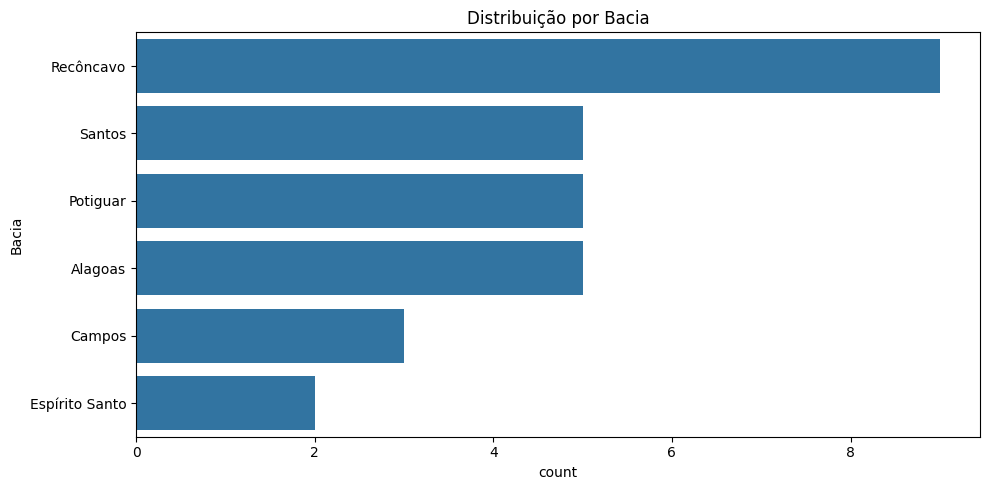

In [19]:

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Bacia', order=df['Bacia'].value_counts().index)
plt.title('Distribuição por Bacia')
plt.tight_layout()
plt.show()

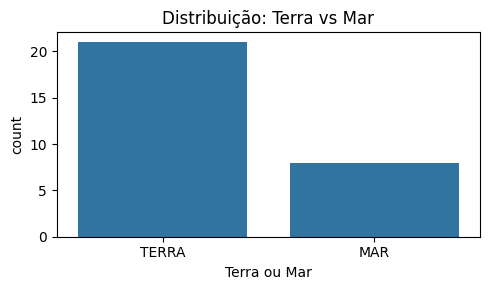

In [20]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Terra ou Mar')
plt.title('Distribuição: Terra vs Mar')
plt.tight_layout()
plt.show()

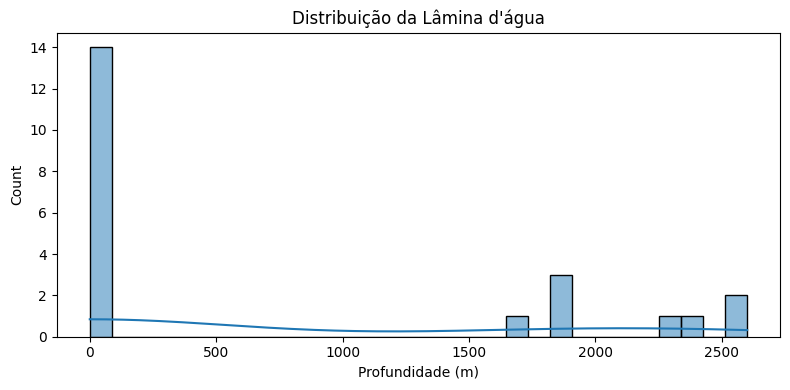

In [21]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Lâmina d'água (m)"].dropna(), bins=30, kde=True)
plt.title("Distribuição da Lâmina d'água")
plt.xlabel("Profundidade (m)")
plt.tight_layout()
plt.show()

In [22]:
mapa = folium.Map(location=[-12, -40], zoom_start=4, tiles='CartoDB positron')
cluster = MarkerCluster().add_to(mapa)

for _, row in df.dropna(subset=['Latitude_decimal', 'Longitude_decimal']).iterrows():
    folium.Marker(
        location=[row['Latitude_decimal'], row['Longitude_decimal']],
        popup=f"{row['Nome Poço ANP']}<br>{row['Bacia']}",
        tooltip=row['Operador']
    ).add_to(cluster)

mapa

Gerar_dados_sinteticos

In [29]:
def gerar_dados_sinteticos(df_original):
    np.random.seed(42)
    n = len(df_original)

    # Porosidade entre 8% e 28%
    df_original['porosidade_pct'] = np.clip(np.random.normal(18, 4, n), 8, 28)

    # Espessura da zona produtiva (m)
    df_original['espessura_zona_prod_m'] = np.random.uniform(5, 60, n)

    # Pressão do reservatório (psi)
    df_original['pressao_reservatorio_psi'] = np.random.lognormal(mean=8, sigma=0.6, size=n)
    df_original['pressao_reservatorio_psi'] = np.clip(df_original['pressao_reservatorio_psi'], 100, 5000)

    # Saturação de óleo
    df_original['saturacao_oleo_pct'] = np.random.uniform(30, 85, n)

    # Litologia com distribuição ponderada
    litologias = ['Arenito', 'Folhelho', 'Calcário', 'Conglomerado']
    probs = [0.6, 0.25, 0.1, 0.05]
    df_original['litologia'] = np.random.choice(litologias, size=n, p=probs)

    # Produtividade (bpd) com fórmula semi-empírica + ruído
    df_original['produtividade_inicial_bpd'] = (
        0.8 * df_original['porosidade_pct'] +
        1.2 * df_original['espessura_zona_prod_m'] +
        0.015 * df_original['pressao_reservatorio_psi'] +
        np.random.normal(0, 20, n)
    )

    # Garante que não tenha produtividade negativa
    df_original['produtividade_inicial_bpd'] = df_original['produtividade_inicial_bpd'].clip(lower=50)

    return df_original


In [33]:
df_sintetico = gerar_dados_sinteticos(df)

df_sintetico[['porosidade_pct', 'espessura_zona_prod_m', 'pressao_reservatorio_psi',
              'saturacao_oleo_pct', 'litologia', 'produtividade_inicial_bpd']].head()


,porosidade_pct,espessura_zona_prod_m,pressao_reservatorio_psi,saturacao_oleo_pct,litologia,produtividade_inicial_bpd
0,19.986857,42.632816,2502.345448,43.711073,Calcário,87.071230
1,17.446943,29.208387,4227.109380,52.571061,Arenito,113.952159
2,20.590754,11.712103,5000.000000,71.555313,Arenito,95.658477
3,24.092119,32.234730,5000.000000,42.583899,Folhelho,151.418624
4,17.063387,6.891369,4689.112815,34.233895,Arenito,126.389143
